## Lab 5: Recap on Dimensionality Reduction Techniques
You are required to use your implementations from previous labs, but for the new algorithms introduced today you can use external libraries.

In [1]:
import numpy as np
import pandas as pd
import gzip
import struct
import sklearn
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

# Exercise 1
Download the ```fashion mnist``` dataset available at the following [link](https://github.com/zalandoresearch/fashion-mnist#get-the-data).

**Goal**: find the best *hyperparameter-method* combination for the problem at hand. Discuss the differences in the obtained results.

In [2]:
def read_idx(filename):
    with gzip.open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [3]:
Xtrain = read_idx('../Datasets/fashion_mnist//train-images-idx3-ubyte.gz')
ytrain=read_idx('../Datasets/fashion_mnist/train-labels-idx1-ubyte.gz')

Xtest = read_idx('../Datasets/fashion_mnist//t10k-images-idx3-ubyte.gz')
ytest =read_idx('../Datasets/fashion_mnist/t10k-labels-idx1-ubyte.gz')

In [4]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
labels_dict = { 0: 'T-shirt/top',
                1: 'Trouser',
                2: 'Pullover', 
                3: 'Dress', 
                4: 'Coat', 
                5: 'Sandal', 
                6: 'Shirt', 
                7: 'Sneaker',
                8: 'Bag', 
                9: 'Ankle boot' }

In [6]:
Xtrain, _, ytrain, _ = train_test_split(Xtrain, ytrain, train_size = 5000, random_state=0)
_, Xtest, _, ytest = train_test_split(Xtest, ytest, test_size = 100, random_state=0)

In [7]:
print(Xtrain.shape)
print(Xtest.shape)

(5000, 28, 28)
(100, 28, 28)


Class: 4 (Coat)


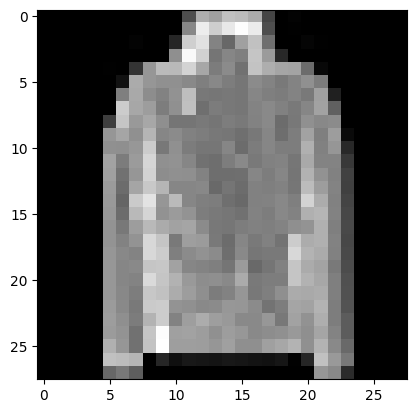

In [8]:
image = Xtrain[0] #first image in the dataset
label = ytrain[0]

print(f"Class: {label} ({labels_dict[label]})")
plt.imshow(image, cmap='gray')
plt.show()

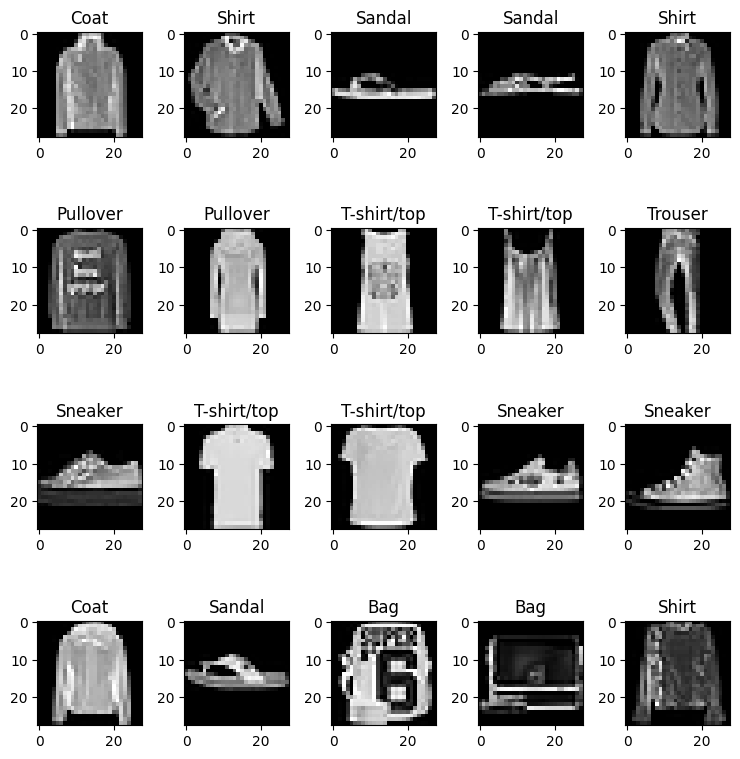

In [9]:
n_row = 4
n_col = 5

n = n_row * n_col
images = Xtrain[:n]
lab = ytrain[:n]

fig, ax = plt.subplots(n_row, n_col, figsize = (1.5*n_col, 2*n_row))
for i in range(n):
    ax_ = ax[i//n_col, i%n_col]
    ax_.imshow(images[i], cmap='gray')
    ax_.set_title(labels_dict[lab[i]])
plt.tight_layout()
plt.show()

In [10]:
#normalize it so that the values are in the [0,1] range
Xtrain = Xtrain/255
Xtest = Xtest/255 

In [11]:
Xtrain = Xtrain - Xtrain.mean(axis=0)
Xtest = Xtest - Xtest.mean(axis=0)

In [12]:
# reshape the images
# this is the format in which you need your data for today

Xtrain = Xtrain.reshape((Xtrain.shape[0],Xtrain.shape[1]*Xtrain.shape[2]))
Xtest = Xtest.reshape((Xtest.shape[0], Xtest.shape[1]*Xtest.shape[2]))

print(Xtrain.shape)
print(Xtest.shape)

(5000, 784)
(100, 784)


- Apply **your own** implementation of PCA to the dataset.

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA()
X_pca = pca.fit_transform(Xtrain)

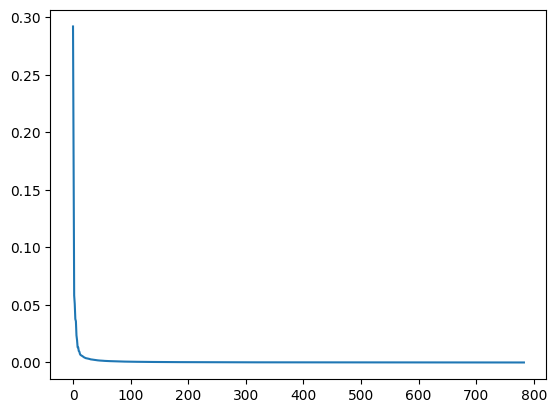

In [16]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

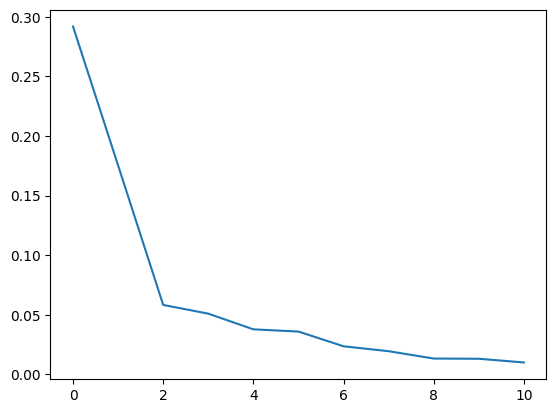

In [17]:
plt.plot(pca.explained_variance_ratio_[:11])
plt.show()

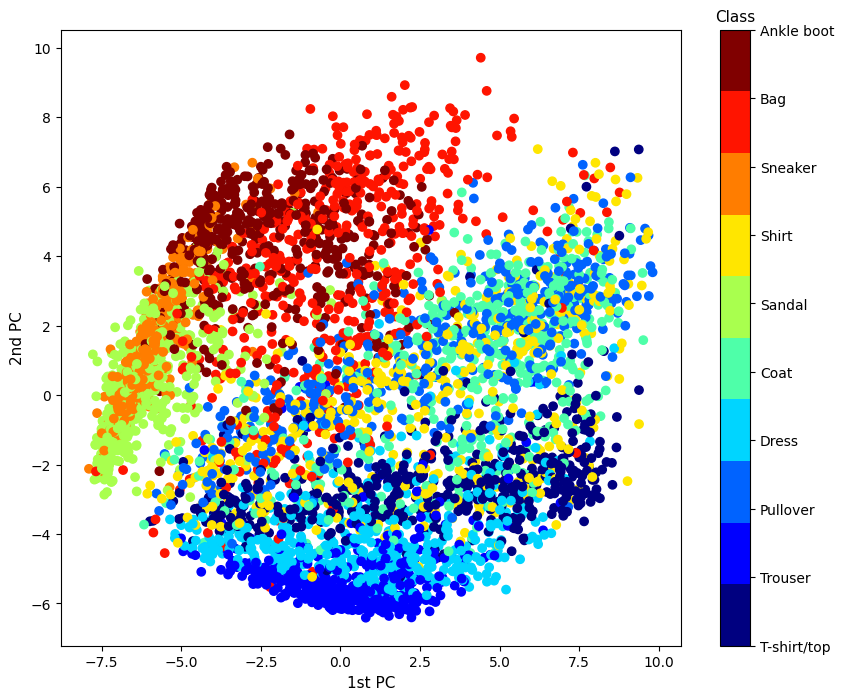

In [18]:
plt.figure(figsize=(10,8))
cmap = plt.get_cmap('jet', 10)
p = plt.scatter(X_pca[:,0], X_pca[:,1], c=ytrain,cmap = cmap)
cb = plt.colorbar(p)
cb.ax.set_title('Class', fontsize=11)
cb.ax.set_yticks(ticks=(np.arange(10)))
cb.ax.set_yticklabels(labels_dict.values())

plt.xlabel('1st PC', fontsize=11)
plt.ylabel('2nd PC', fontsize=11)
plt.show()

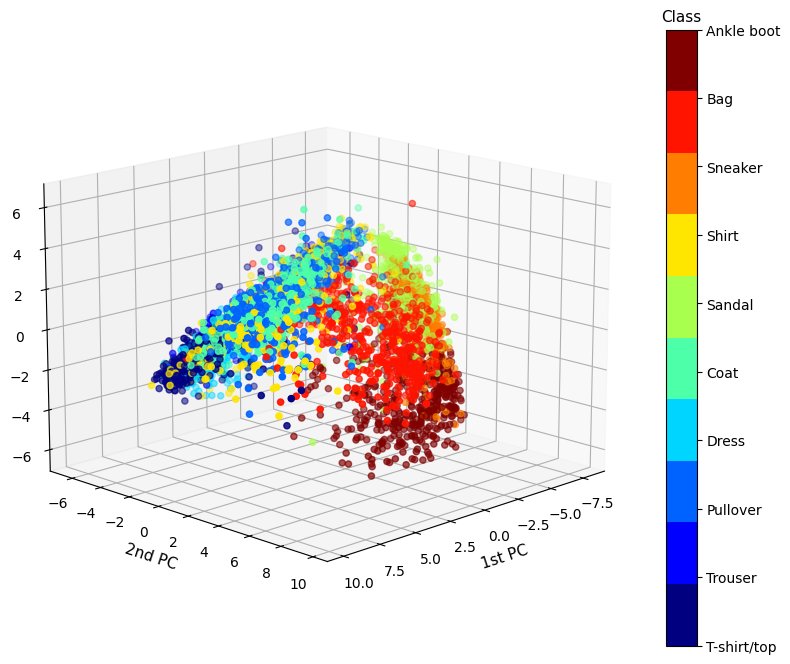

In [19]:
plt.figure(figsize=(10,8))
cmap = plt.get_cmap('jet', 10)
axes = plt.axes(projection='3d')
p = axes.scatter3D(X_pca[:,0], X_pca[:,1], X_pca[:,2],c=ytrain, cmap = cmap)
cb = plt.colorbar(p)
cb.ax.set_title('Class', fontsize=11)
cb.ax.set_yticks(ticks=(np.arange(10)))
cb.ax.set_yticklabels(labels_dict.values())

axes.set_xlabel('1st PC', fontsize=11)
axes.set_ylabel('2nd PC', fontsize=11)
axes.set_zlabel('3rd PC', fontsize=11)

axes.view_init(15, 45)

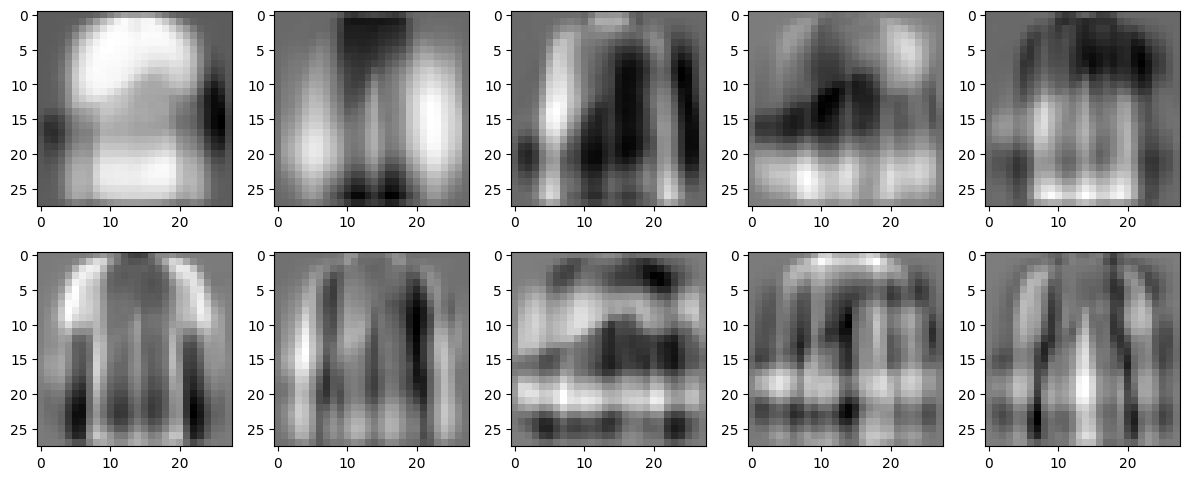

In [20]:
n_col = 5
n_row = 2

pc_10 = [pca.components_[i].reshape(28,28) for i in range(0,10)]
fig, axes=plt.subplots(n_row, n_col, figsize=(12, 5))
for i in range(10):
    ax = axes[i//n_col, i%n_col]
    ax.imshow(pc_10[i], cmap='gray')
plt.tight_layout()
plt.show()

- Apply **your own** implementation of KernelPCA to the dataset, both with a polynomial and a Gaussian kernel.

In [21]:
from sklearn.decomposition import KernelPCA

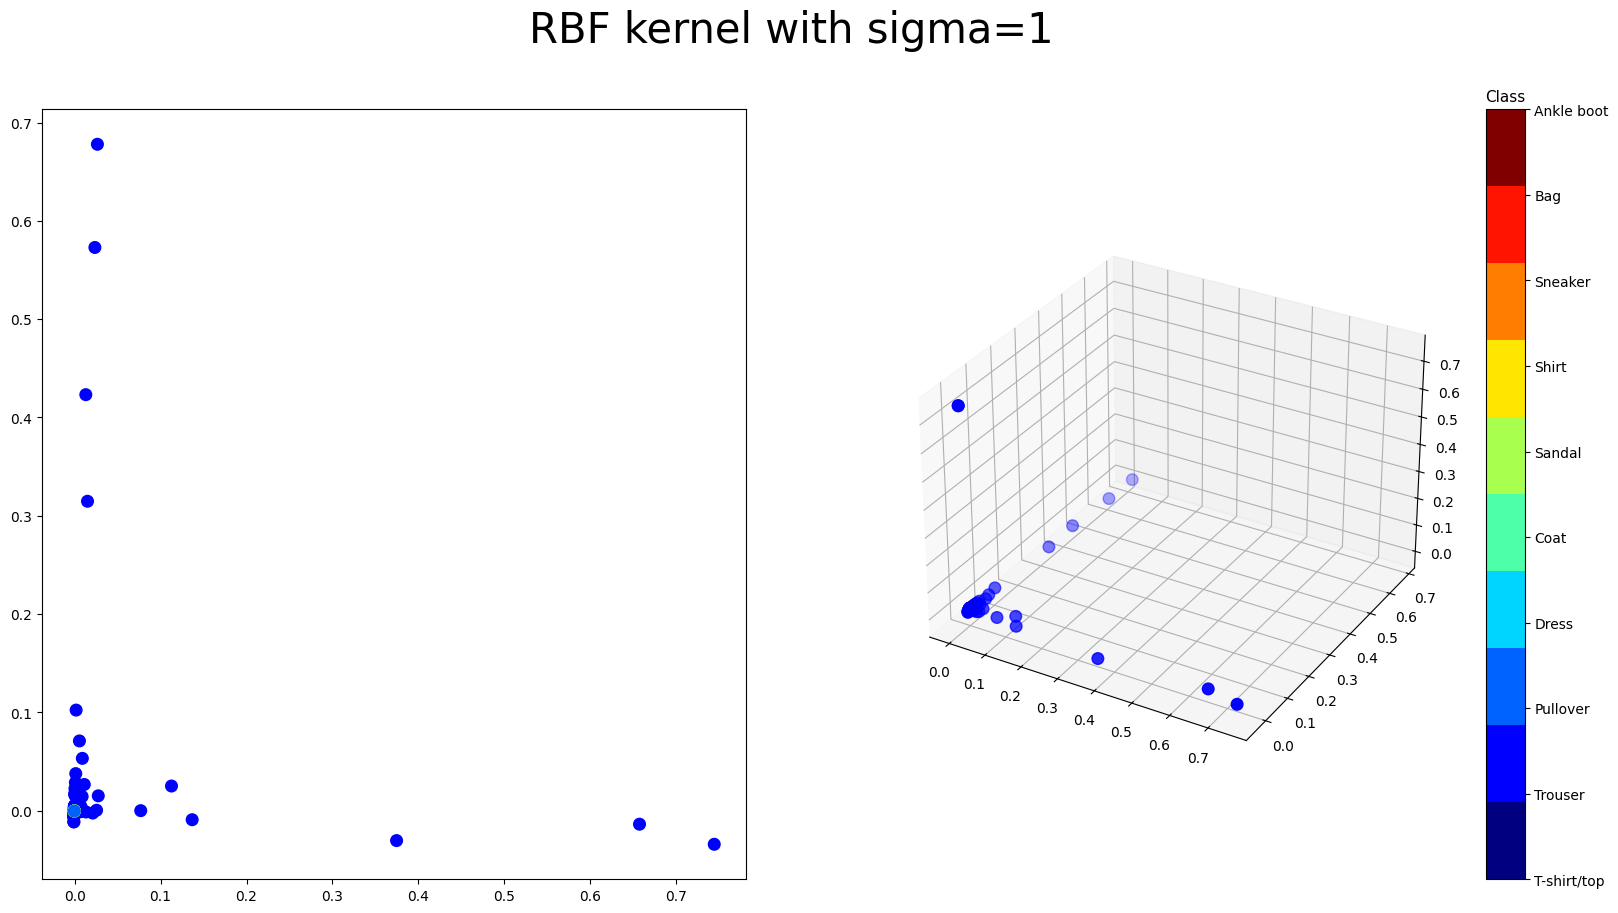

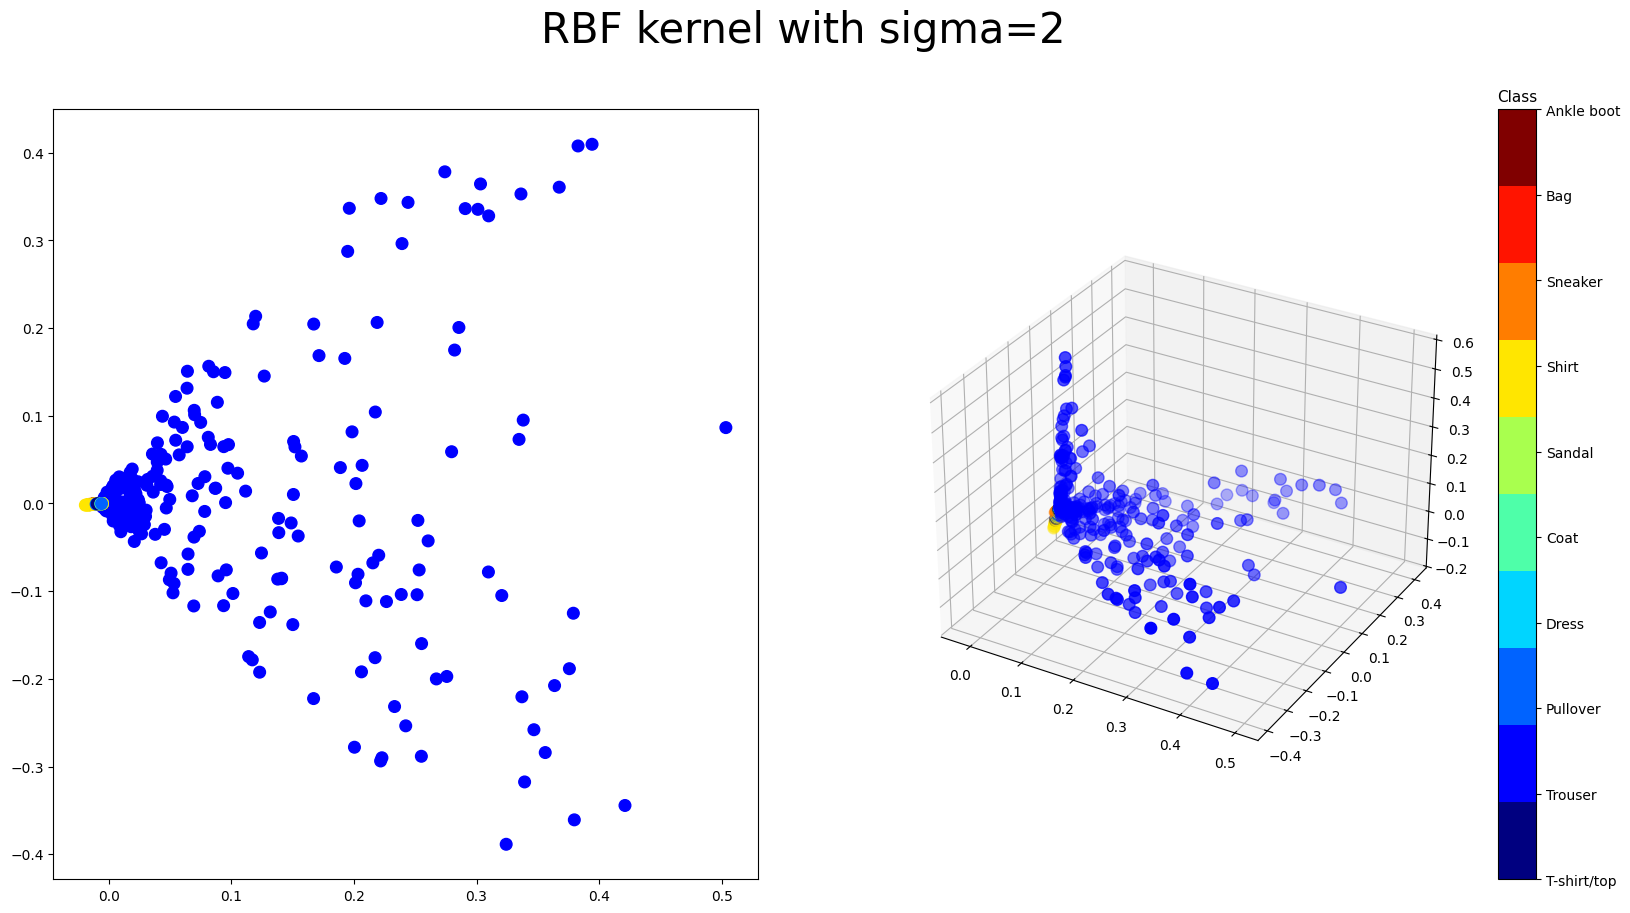

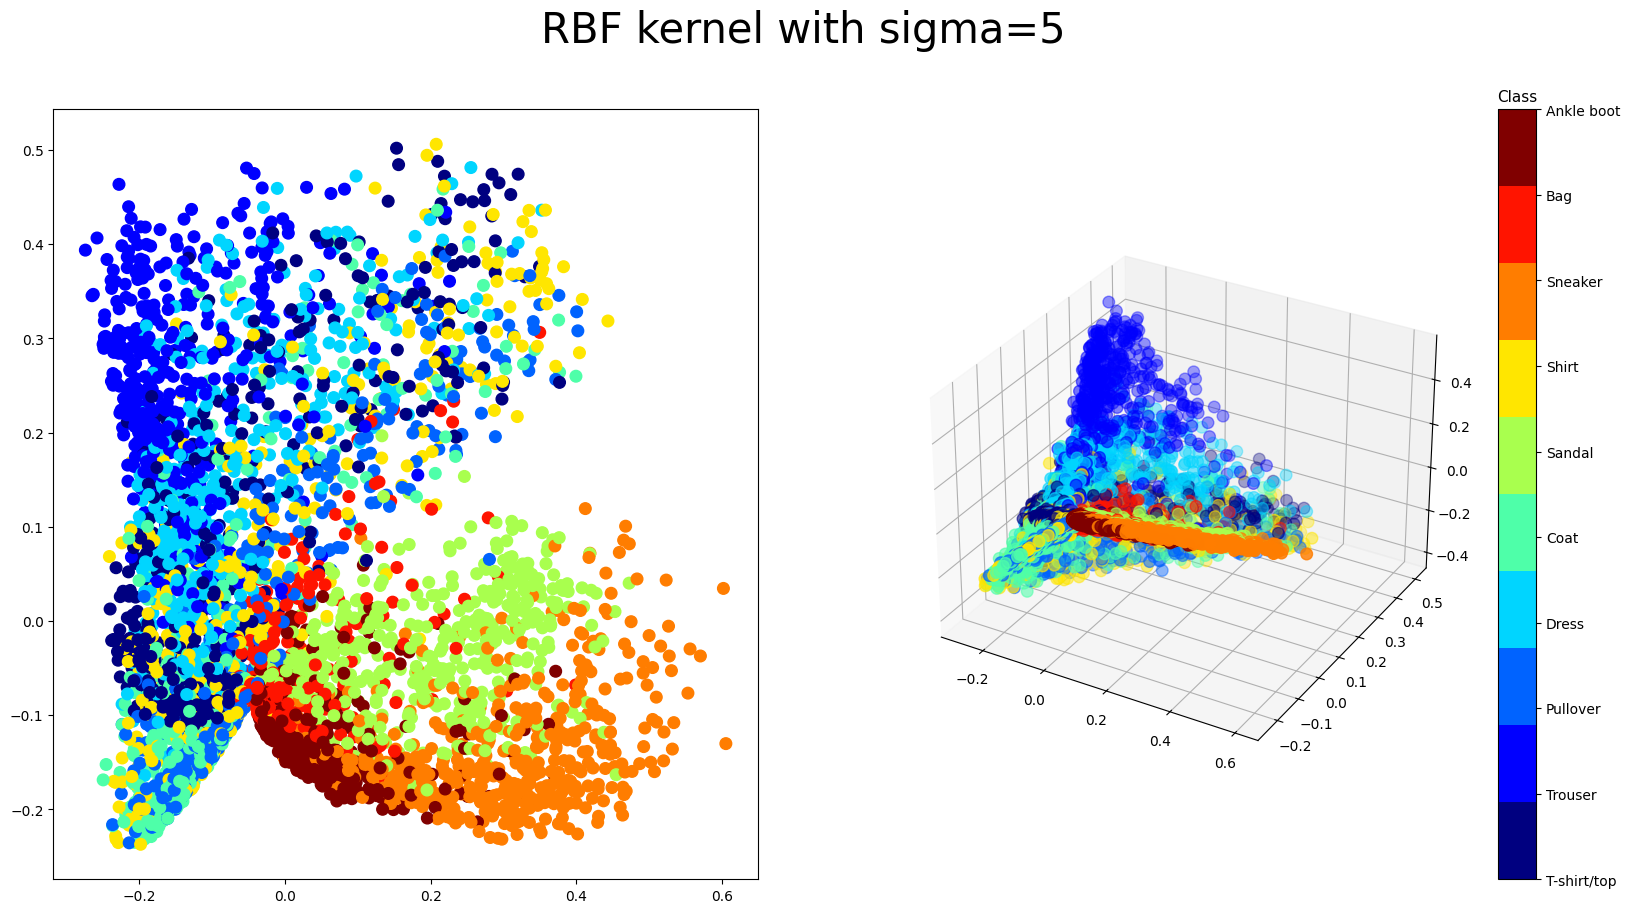

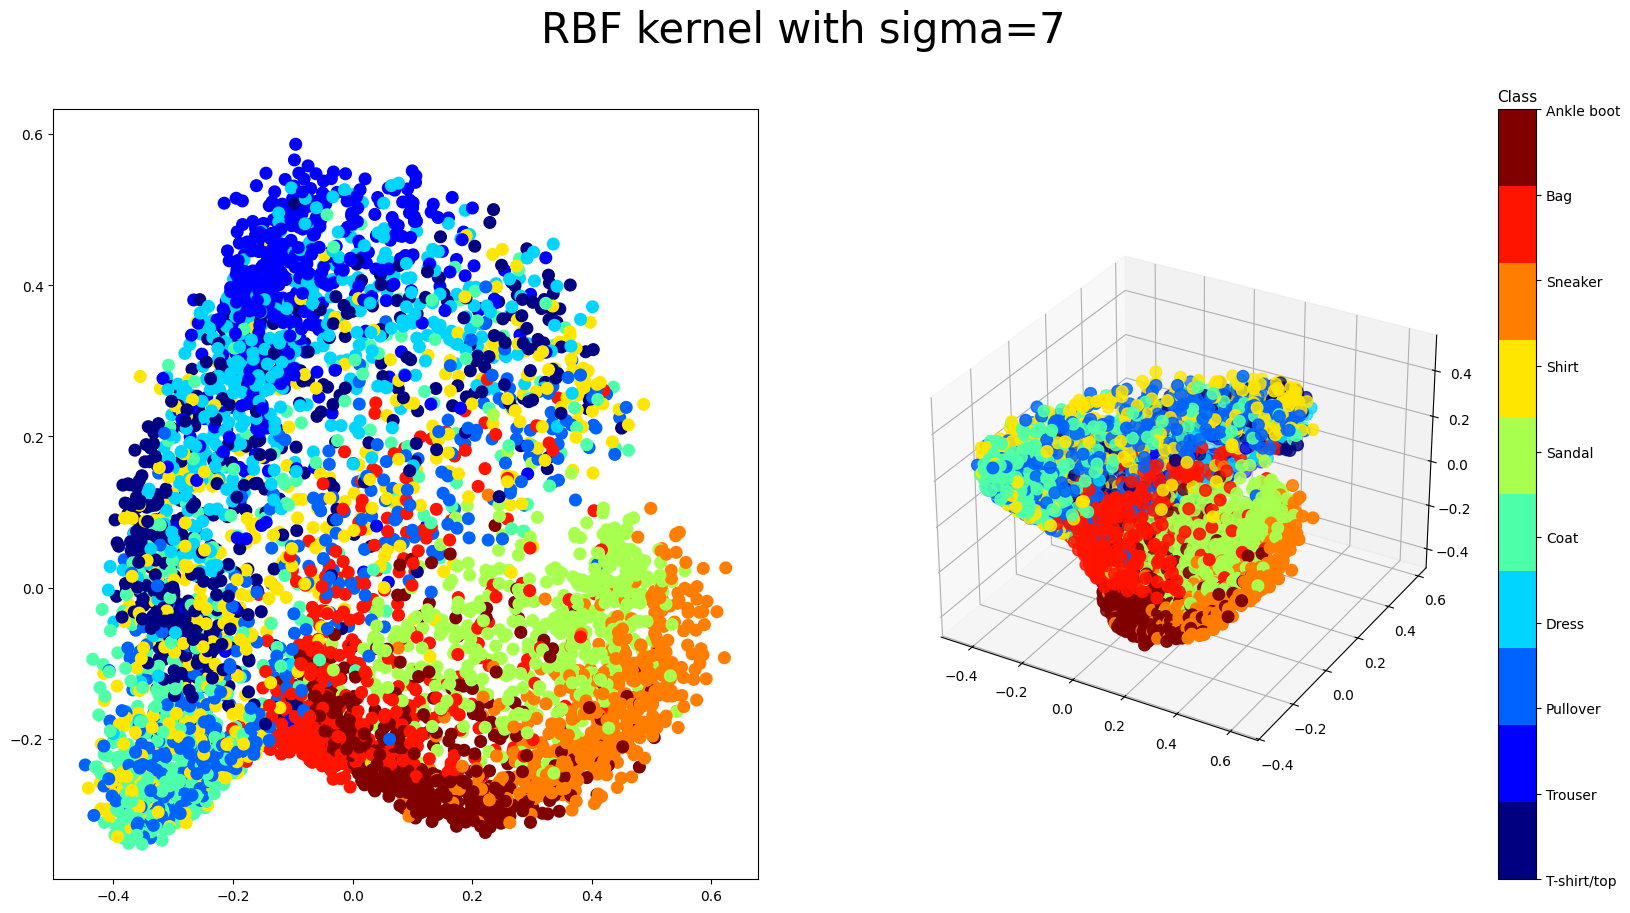

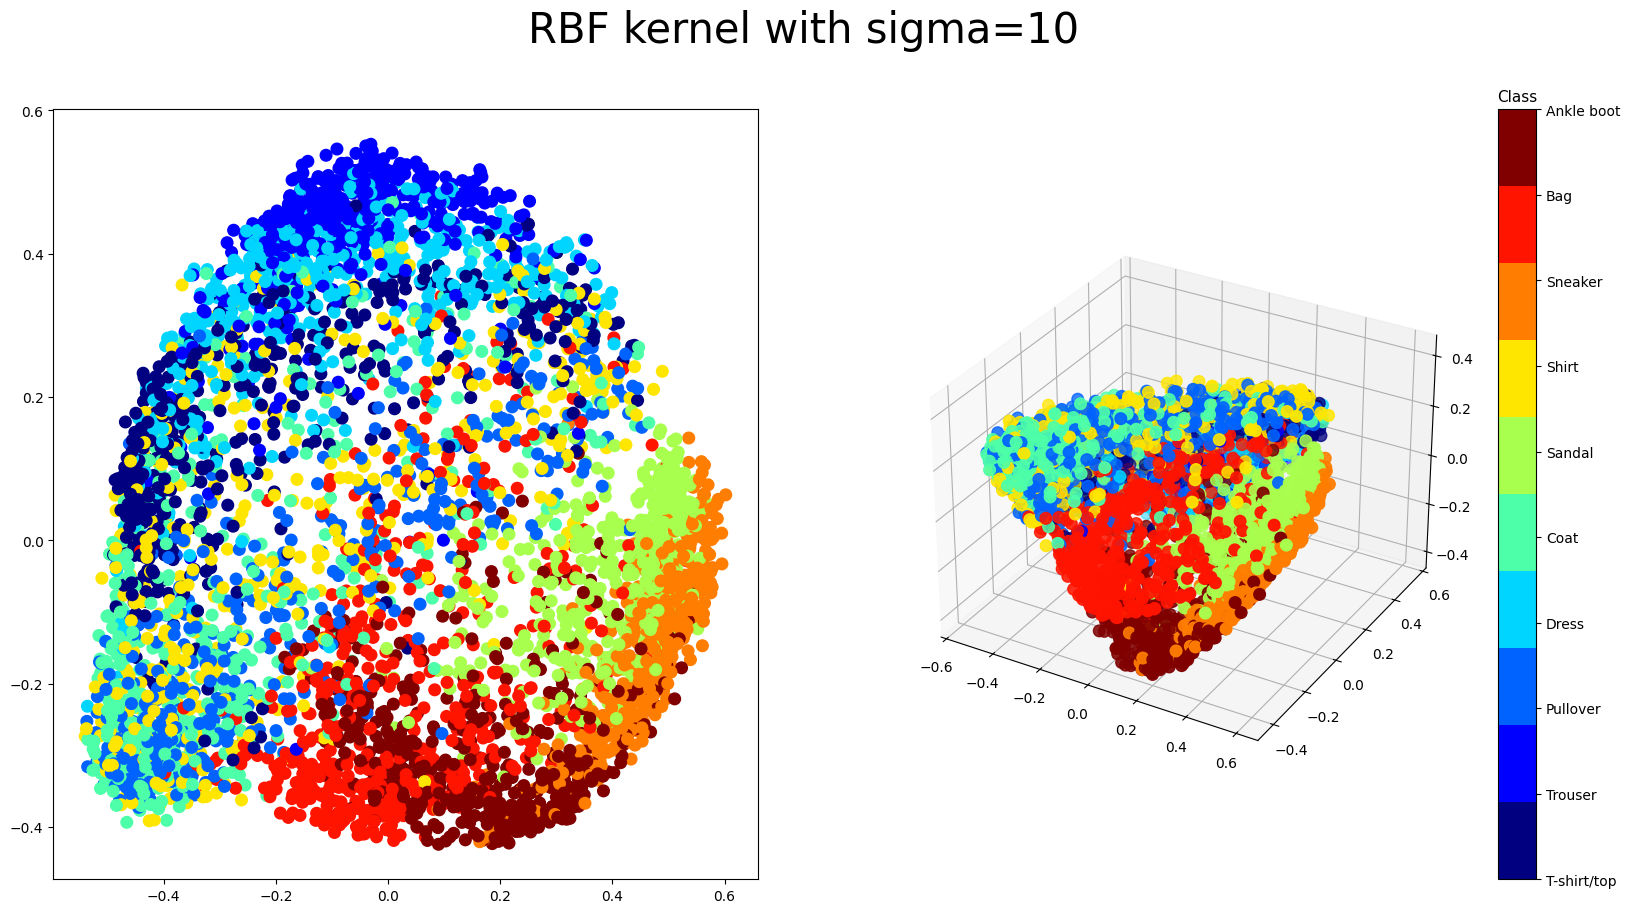

In [22]:
for sigma in (1, 2, 5, 7, 10):
    kernel_rbf = KernelPCA(kernel='rbf', gamma=(sigma)**(-2))
    X_kpca = kernel_rbf.fit_transform(Xtrain)
    
    fig = plt.figure(figsize=(20,10))
    cmap = plt.get_cmap('jet', 10)
    fig.suptitle(f"RBF kernel with sigma={sigma}", fontsize=30)
    ax = fig.add_subplot(1,2,1)
    ax.scatter(X_kpca[:,0], X_kpca[:,1], c=ytrain, s=70, cmap = cmap)

    ax = fig.add_subplot(1,2,2, projection='3d')
    p = ax.scatter3D(X_kpca[:,0], X_kpca[:,1], X_kpca[:,2], c=ytrain, s=70, cmap = cmap)

    cb = plt.colorbar(p)
    cb.ax.set_title('Class', fontsize=11)
    cb.ax.set_yticks(ticks=(np.arange(10)))
    cb.ax.set_yticklabels(labels_dict.values())
    plt.show()

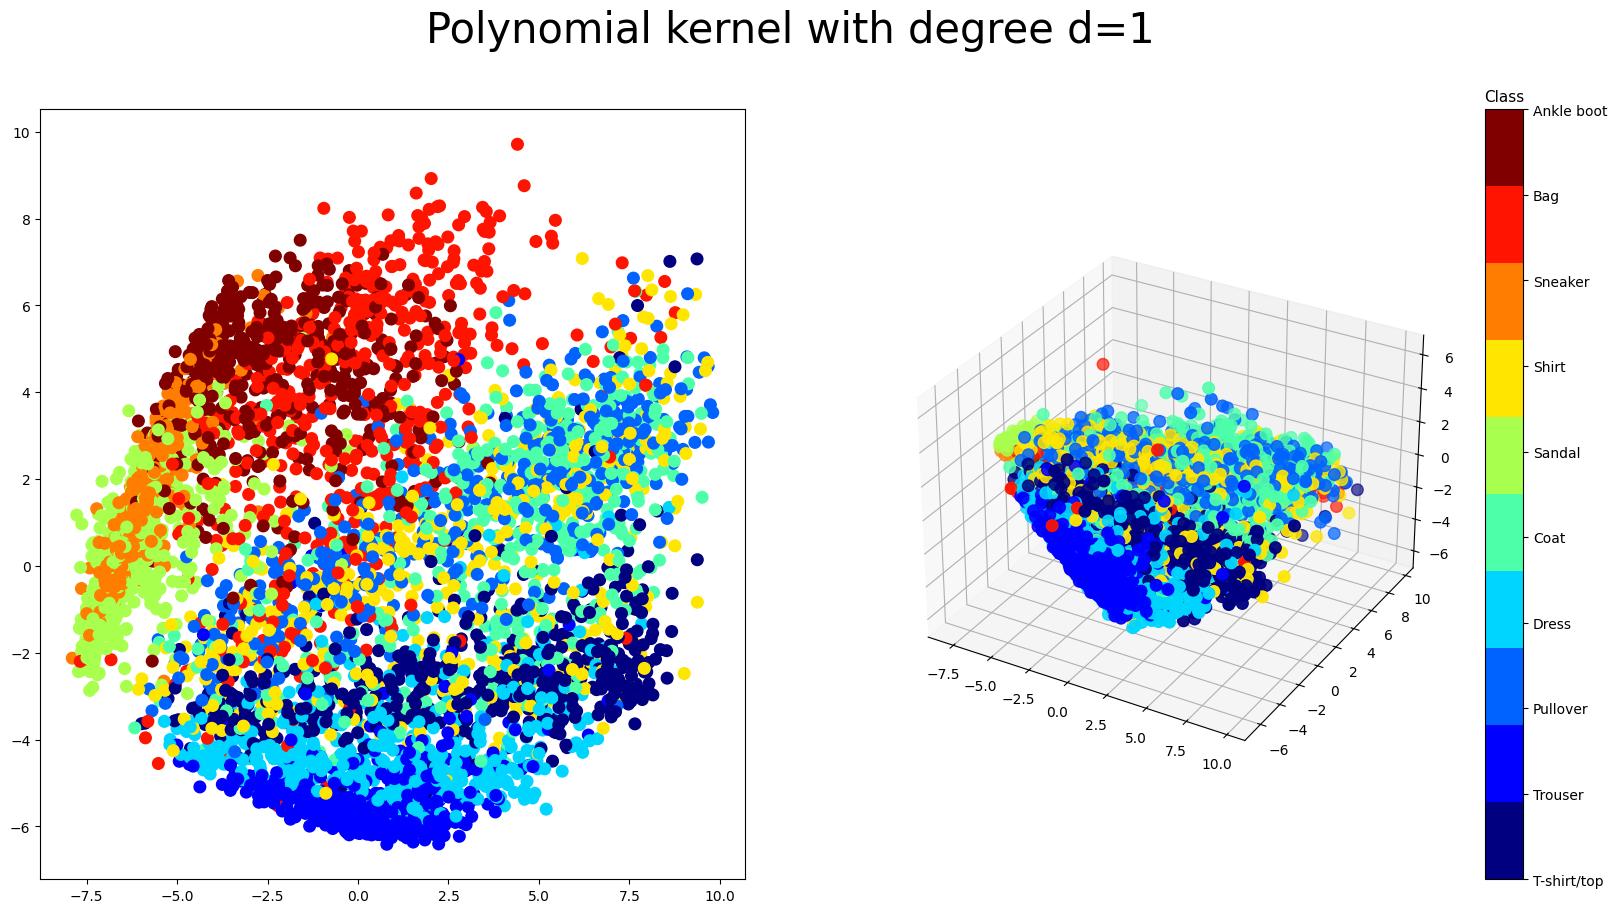

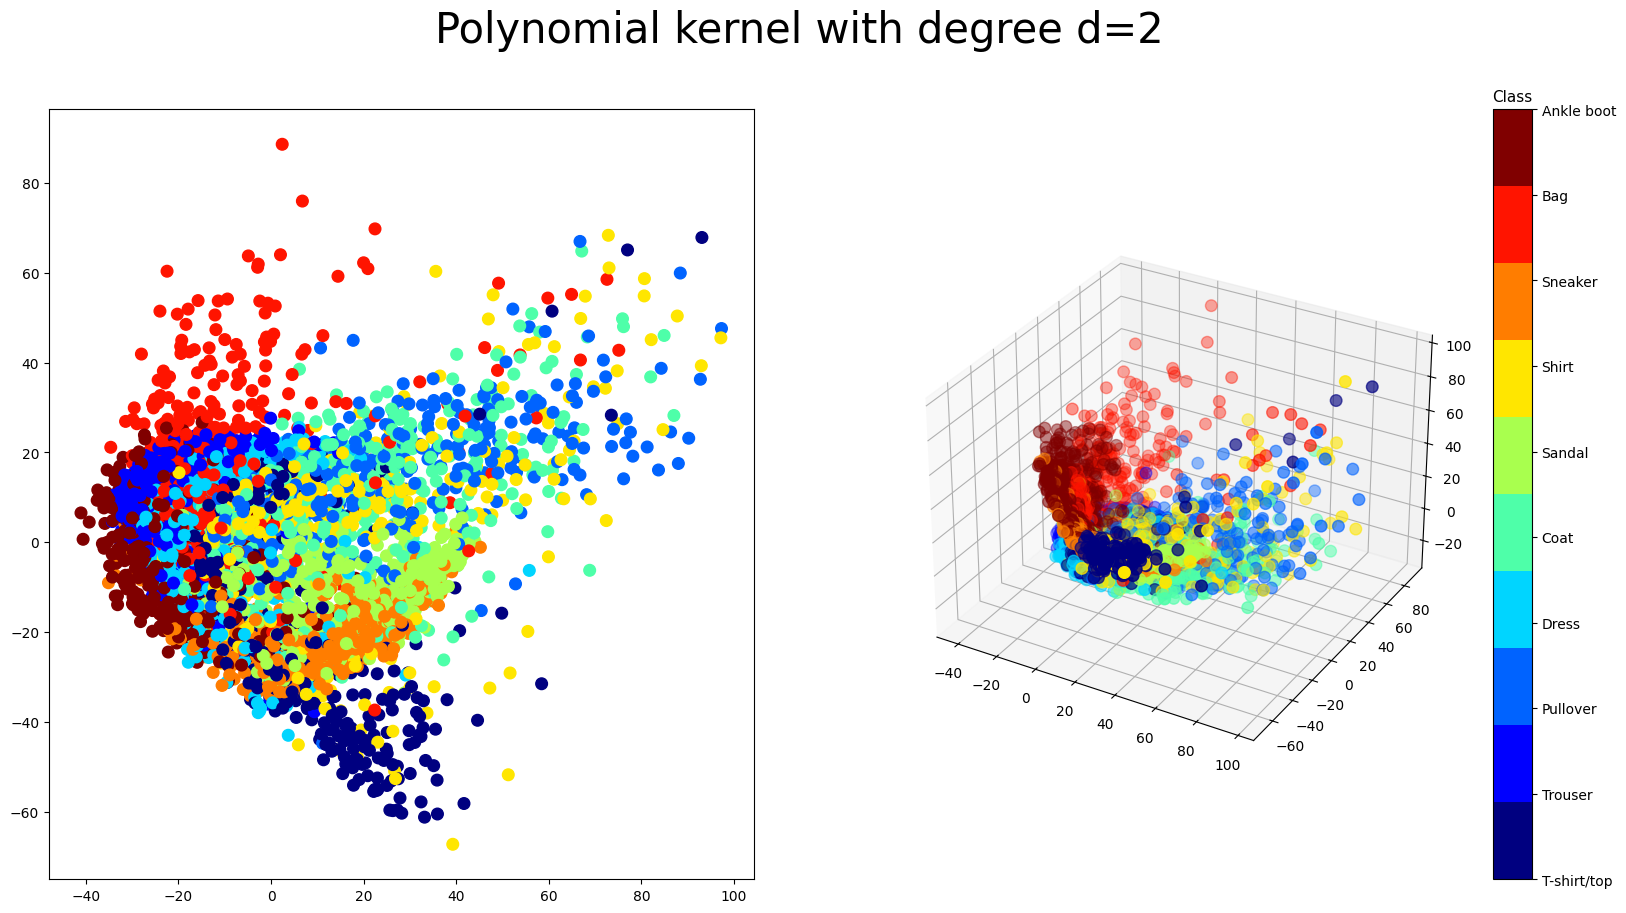

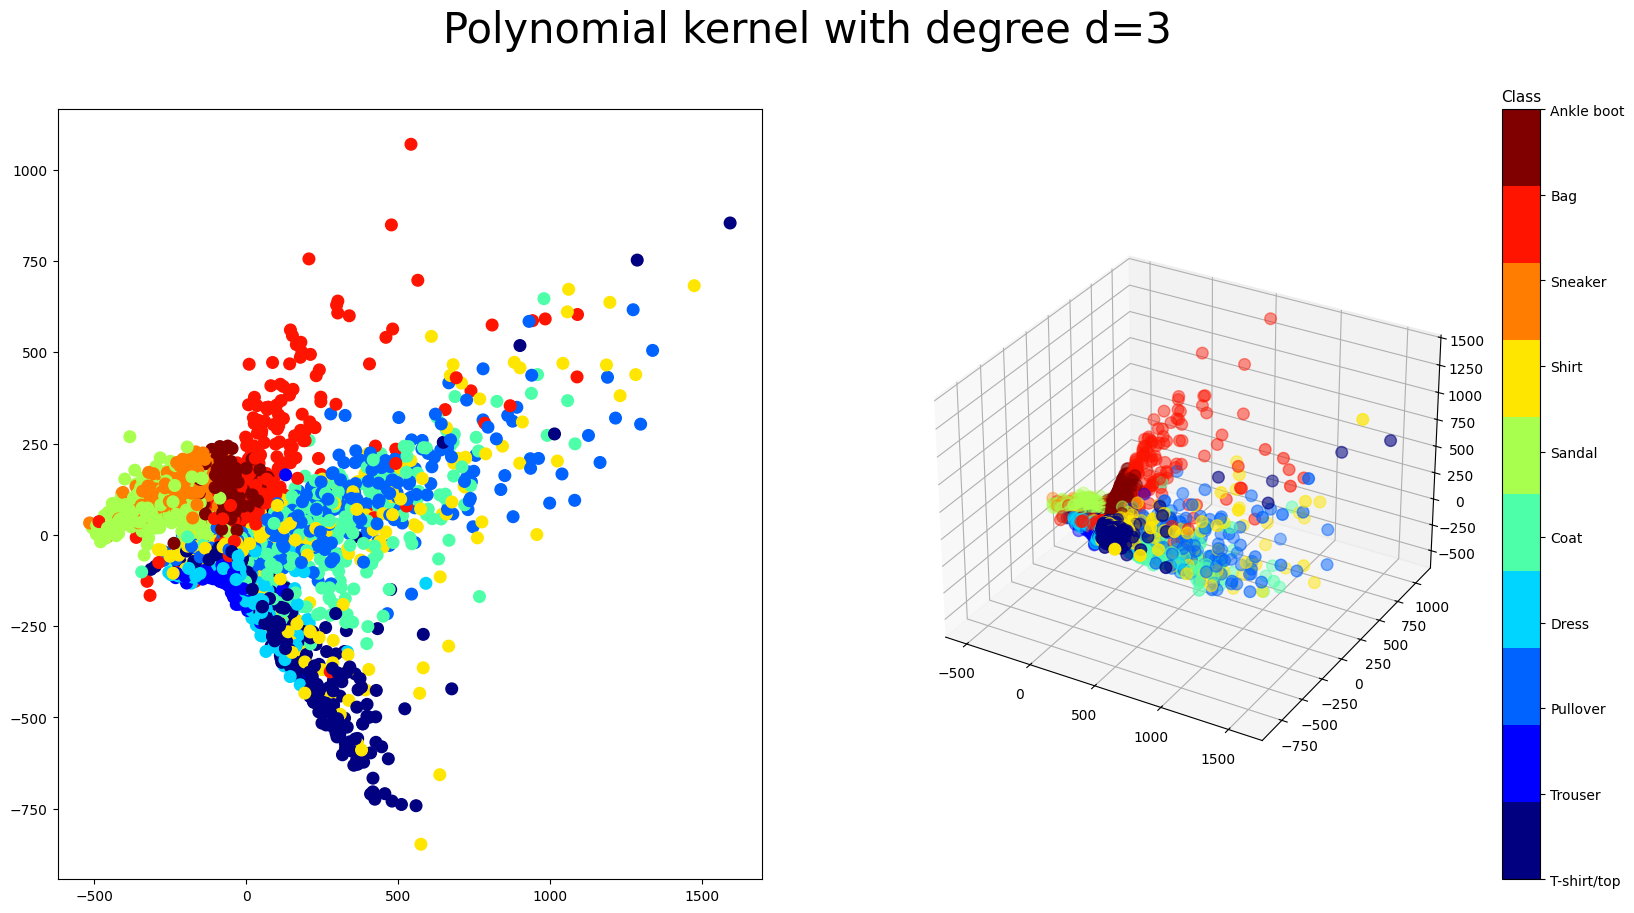

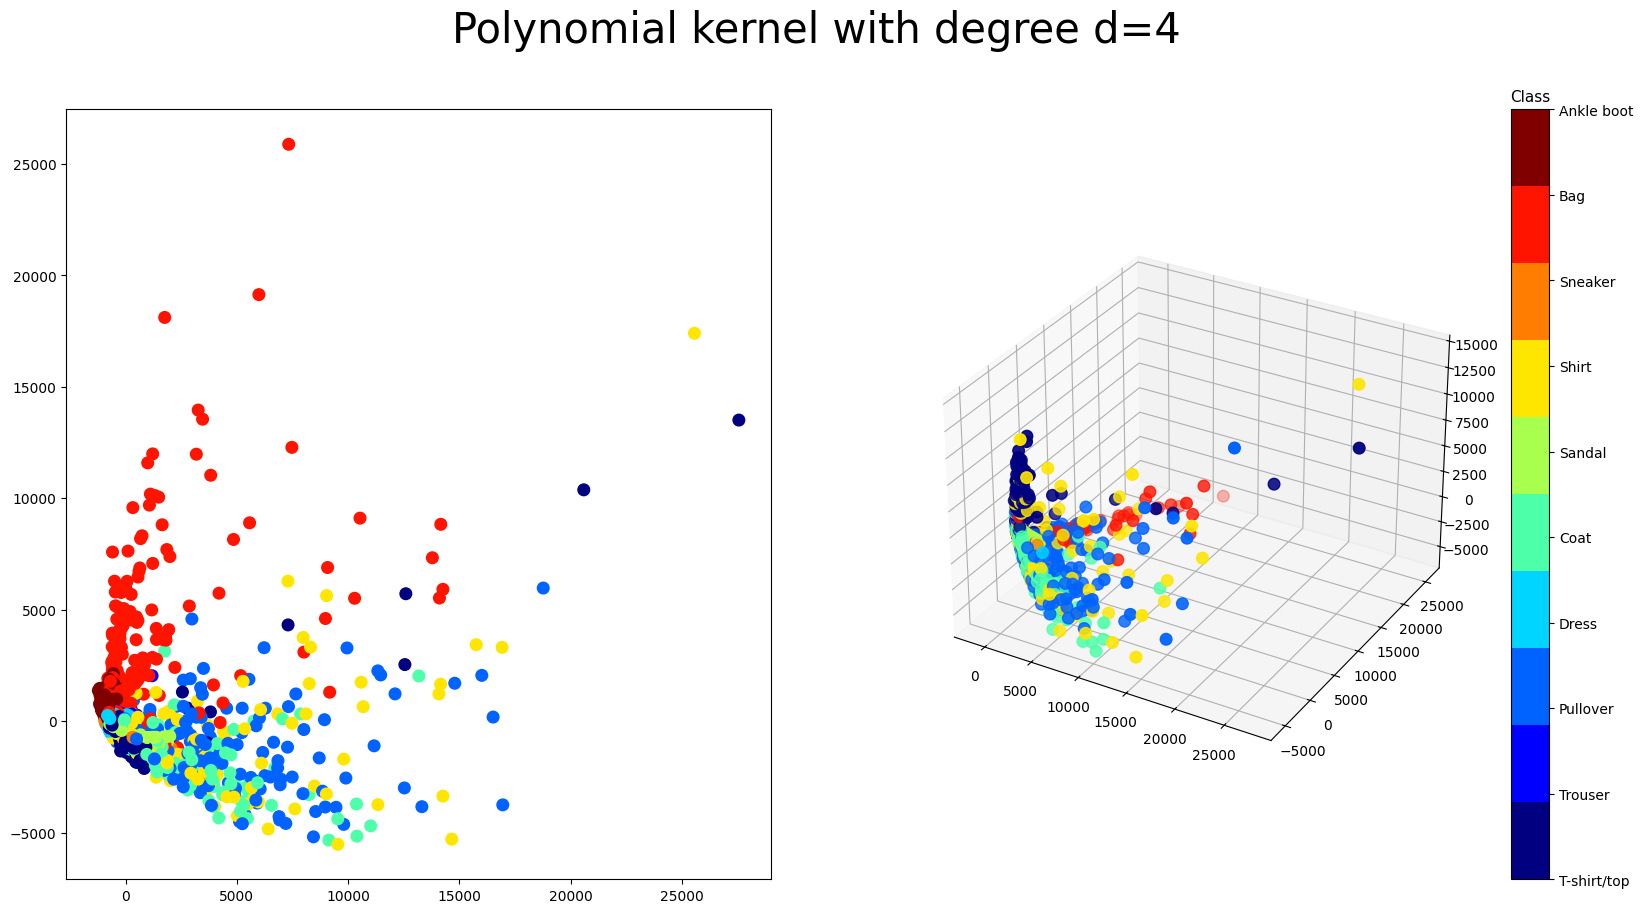

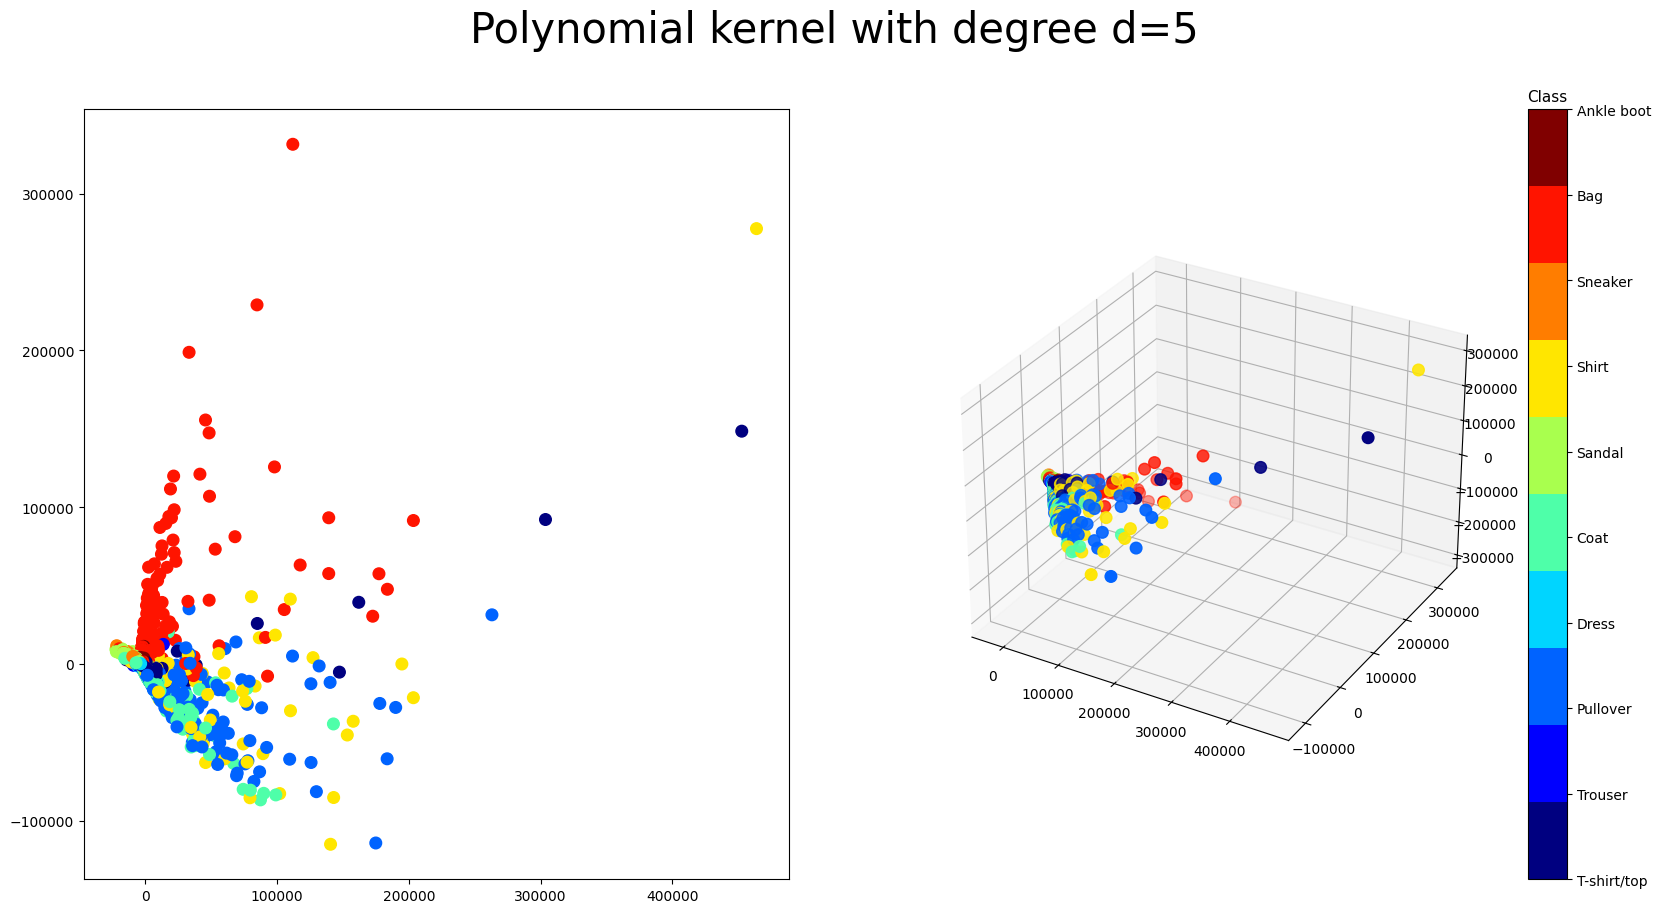

In [23]:
for delta in (1,2,3,4,5):
    kernel_poly = KernelPCA(n_components =3, kernel='poly', degree=delta, gamma=1, coef0=1)
    #k(x,y)=((x^T)y +1)^d
    X_kpca = kernel_poly.fit_transform(Xtrain)
    
    fig = plt.figure(figsize=(20,10))
    cmap = plt.get_cmap('jet', 10)
    fig.suptitle(f"Polynomial kernel with degree d={delta}", fontsize=30)
    ax = fig.add_subplot(1,2,1)
    ax.scatter(X_kpca[:,0], X_kpca[:,1], c=ytrain, s=70, cmap = cmap)
    
    ax = fig.add_subplot(1,2,2, projection='3d')
    p = ax.scatter3D(X_kpca[:,0], X_kpca[:,1], X_kpca[:,2], c=ytrain, s=70, cmap= cmap)

    cb = plt.colorbar(p)
    cb.ax.set_title('Class', fontsize=11)
    cb.ax.set_yticks(ticks=(np.arange(10)))
    cb.ax.set_yticklabels(labels_dict.values())
    plt.show()

- Apply **your own** implementation of ISOMAP to the dataset, keeping in mind that you'll need to perform an undersampling. As an alternative, you may use the ```sklearn``` implementation on the whole dataset.

In [24]:
from sklearn.manifold import Isomap

In [25]:
isomap = Isomap(n_components=3, path_method='FW')

In [26]:
X_isomap = isomap.fit_transform(Xtrain)

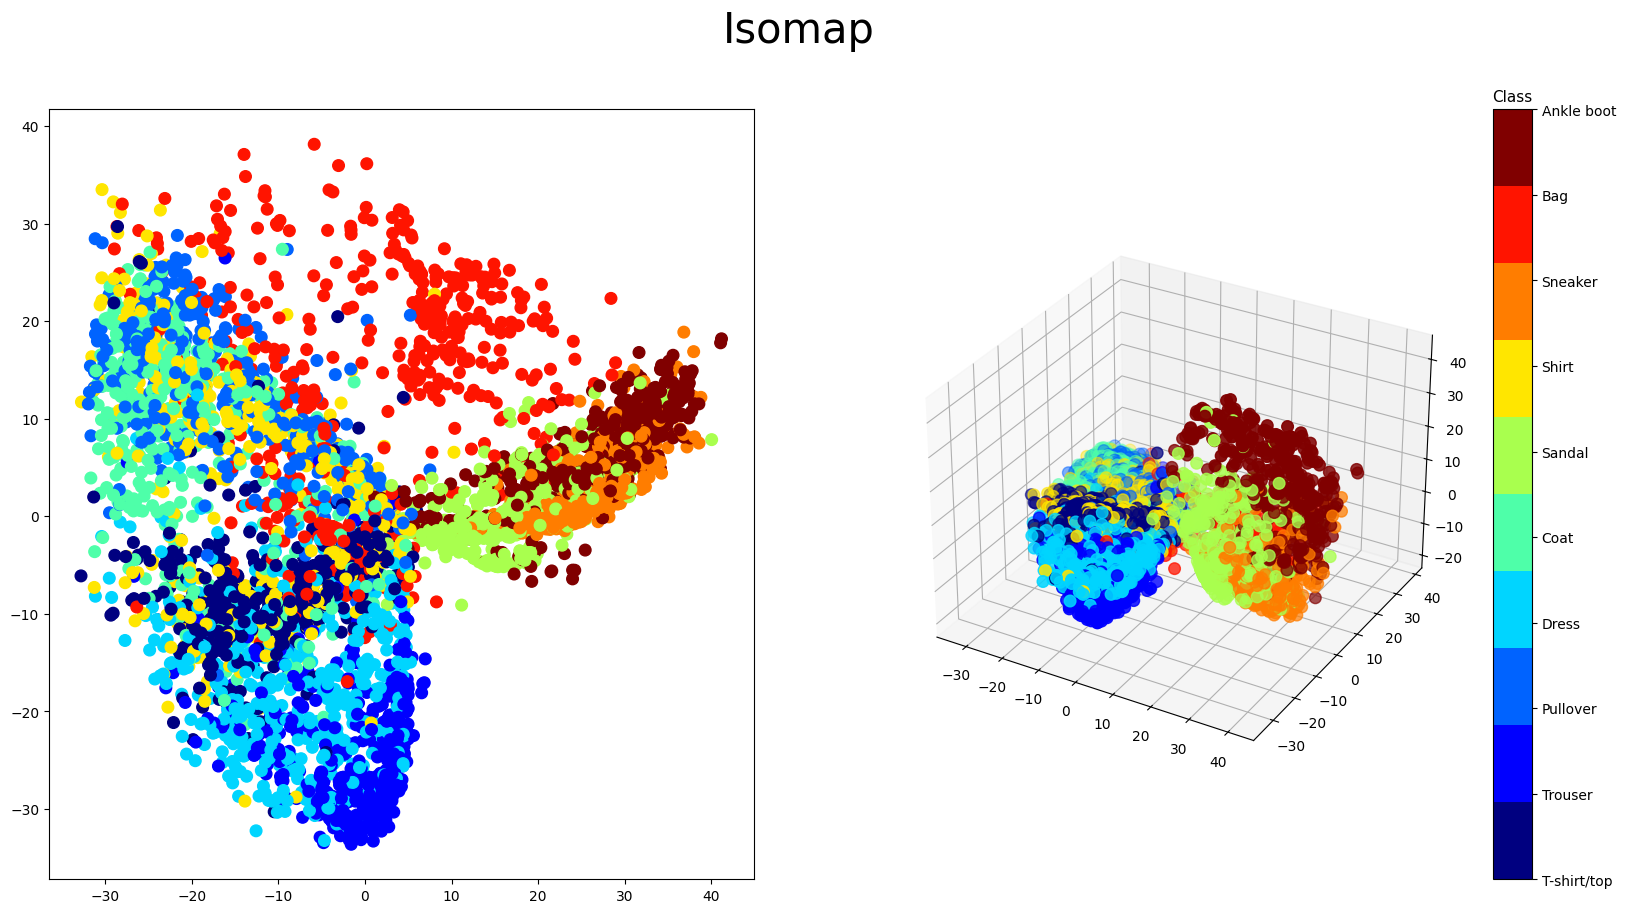

In [27]:
fig = plt.figure(figsize=(20,10))
cmap = plt.get_cmap('jet', 10)
fig.suptitle("Isomap", fontsize=30)
ax = fig.add_subplot(1,2,1)
ax.scatter(X_isomap[:,0], X_isomap[:,1], c=ytrain, s=70, cmap = cmap)

ax = fig.add_subplot(1,2,2, projection='3d')
p = ax.scatter3D(X_isomap[:,0], X_isomap[:,1], X_isomap[:,2], c=ytrain, s=70, cmap= cmap)

cb = plt.colorbar(p)
cb.ax.set_title('Class', fontsize=11)
cb.ax.set_yticks(ticks=(np.arange(10)))
cb.ax.set_yticklabels(labels_dict.values())
plt.show()

- Apply the appropriate implementation of t-SNE to the dataset. Look at the documentation available online and choose consequently.

In [28]:
from sklearn.manifold import TSNE

In [29]:
tsne = TSNE(n_components=3)

In [30]:
X_tsne = tsne.fit_transform(Xtrain)

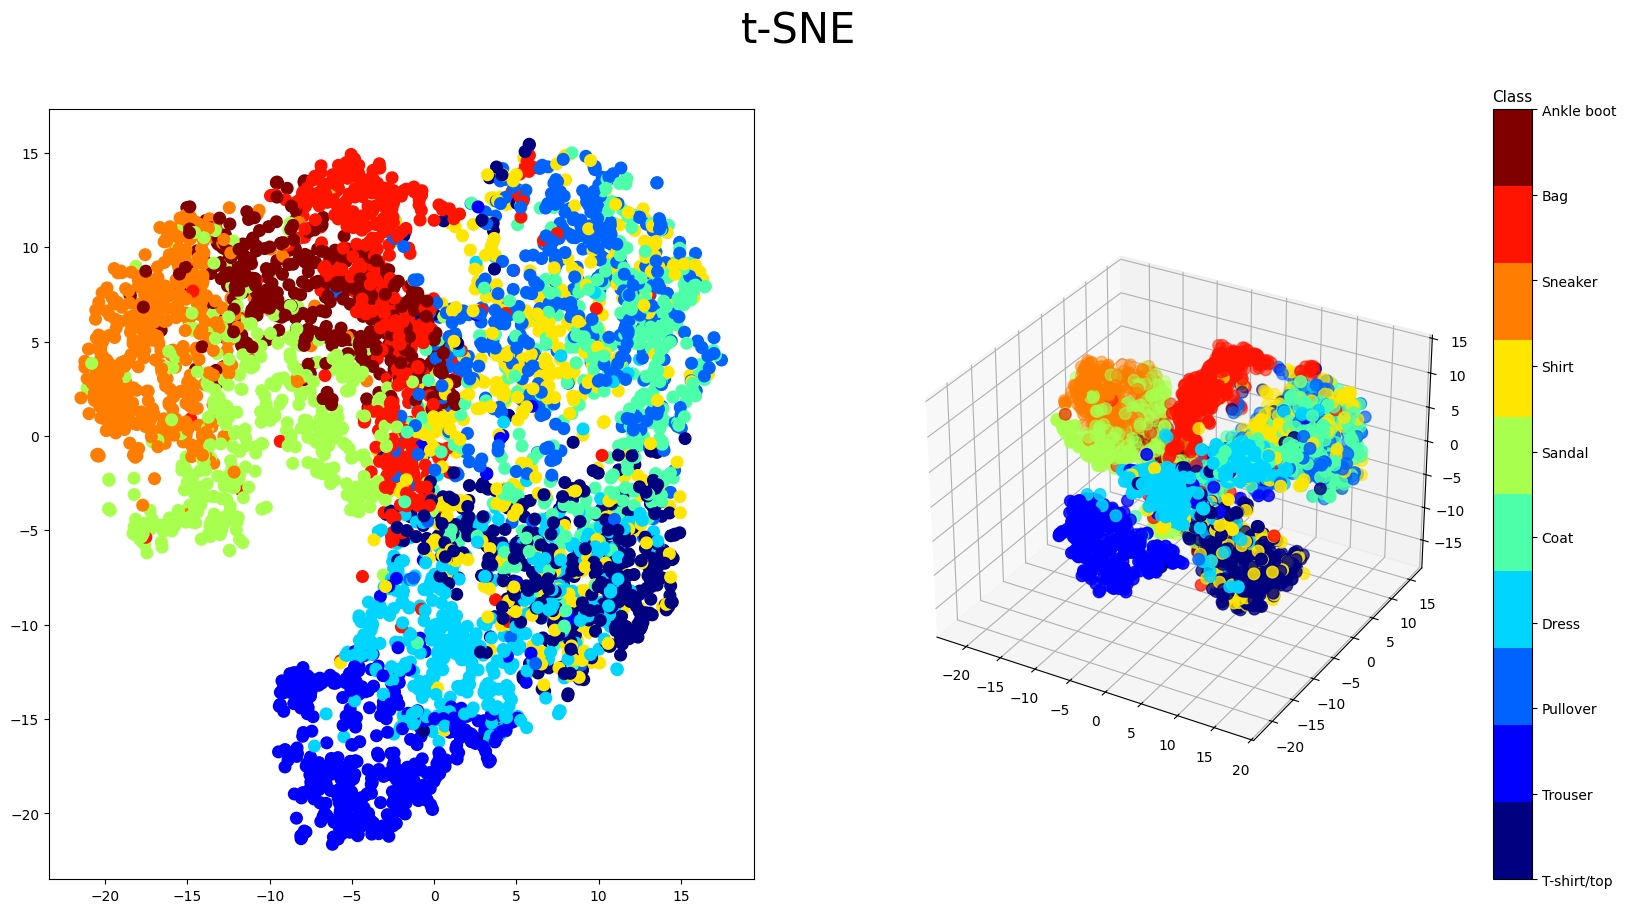

In [31]:
fig = plt.figure(figsize=(20,10))
cmap = plt.get_cmap('jet', 10)
fig.suptitle("t-SNE", fontsize=30)
ax = fig.add_subplot(1,2,1)
ax.scatter(X_tsne[:,0], X_tsne[:,1], c=ytrain, s=70, cmap= cmap)

ax = fig.add_subplot(1,2,2, projection='3d')
p = ax.scatter3D(X_tsne[:,0], X_tsne[:,1], X_tsne[:,2], c=ytrain, s=70, cmap= cmap)

cb = plt.colorbar(p)
cb.ax.set_title('Class', fontsize=11)
cb.ax.set_yticks(ticks=(np.arange(10)))
cb.ax.set_yticklabels(labels_dict.values())
plt.show()

- Apply the appropriate implementation of UMAP to the dataset. Look at the [documentation](https://umap-learn.readthedocs.io/en/latest/) available online and choose consequently.

In [33]:
import umap

In [34]:
umap_embedding = umap.UMAP(n_components=3, n_neighbors = 10)

In [35]:
X_umap = umap_embedding.fit_transform(Xtrain)

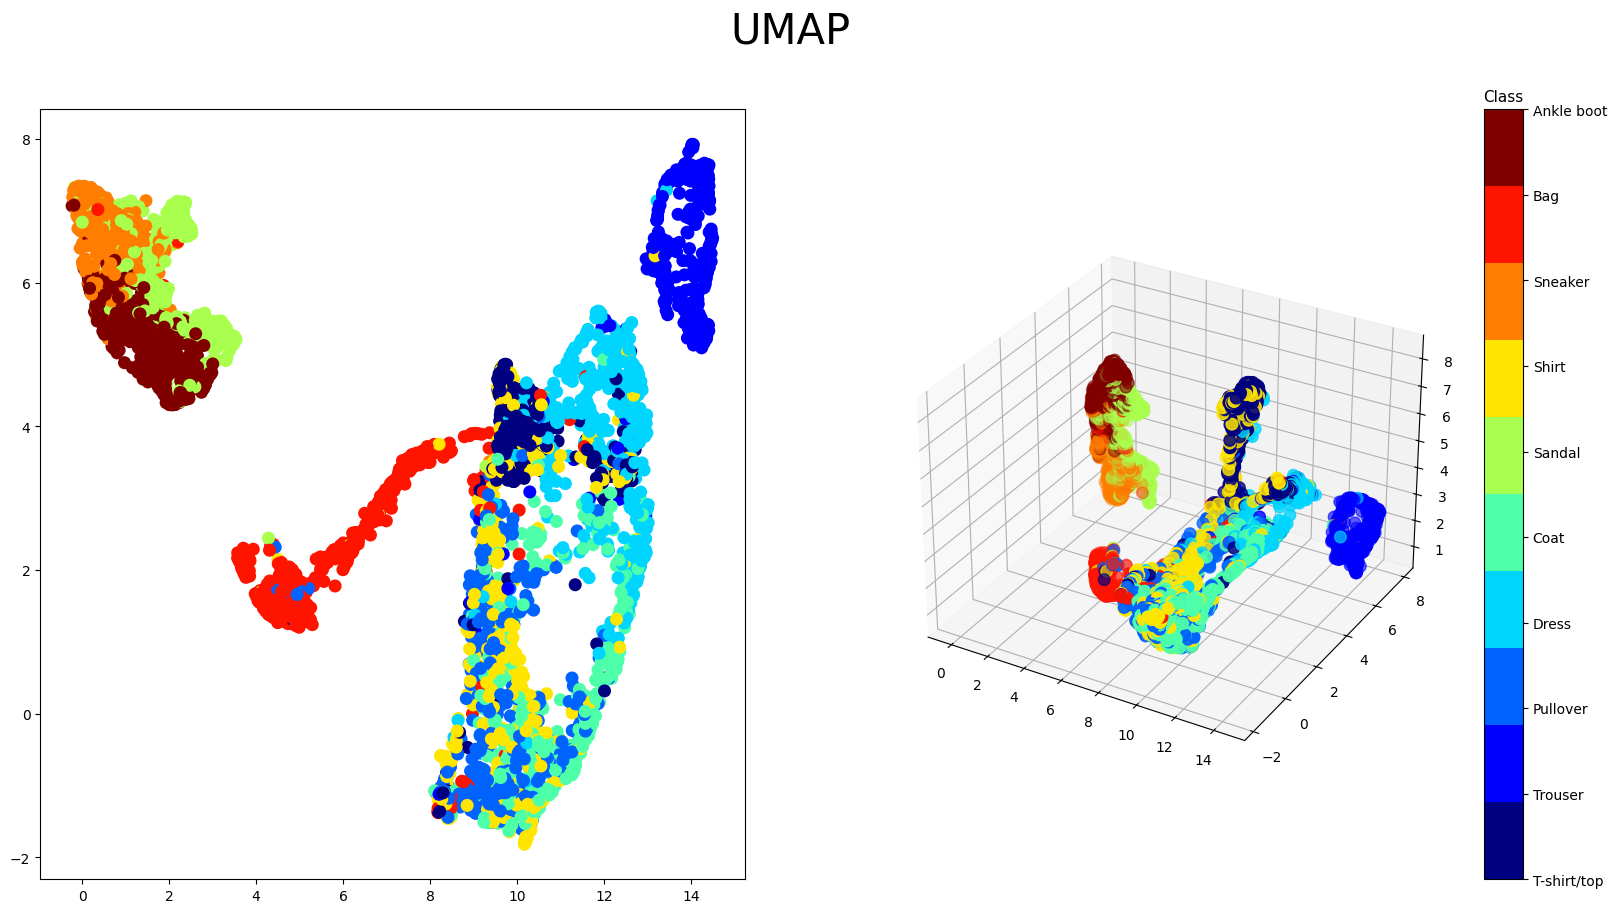

In [36]:
fig = plt.figure(figsize=(20,10))
cmap = plt.get_cmap('jet', 10)
fig.suptitle("UMAP", fontsize=30)
ax = fig.add_subplot(1,2,1)
ax.scatter(X_umap[:,0], X_umap[:,1], c=ytrain, s=70, cmap=cmap)

ax = fig.add_subplot(1,2,2, projection='3d')
p = ax.scatter3D(X_umap[:,0], X_umap[:,1], X_umap[:,2], c=ytrain, s=70, cmap= cmap)

cb = plt.colorbar(p)
cb.ax.set_title('Class', fontsize=11)
cb.ax.set_yticks(ticks=(np.arange(10)))
cb.ax.set_yticklabels(labels_dict.values())
plt.show()

- Have a look at the autoencoder provided in the notebook and apply it to the dataset. Modify the number of layers and activation functions.

In [13]:
# shaping necessary for the autoencoder

X_train = Xtrain.reshape((Xtrain.shape[0], 1, 28, 28))
X_test = Xtest.reshape((Xtest.shape[0], 1, 28, 28))

In [14]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()

In [15]:
print(X_train.shape)
print(X_test.shape)

torch.Size([5000, 1, 28, 28])
torch.Size([100, 1, 28, 28])


In [16]:
train_set = torch.utils.data.TensorDataset(X_train, X_train)
train_set, val_set = torch.utils.data.random_split(train_set, [round(len(train_set)*0.8), round(len(train_set)*0.2)])
test_set = torch.utils.data.TensorDataset(X_test, X_test)

In [17]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle = True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 1, shuffle = False)

In [18]:
# Define the model class
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        # define the encoder
        self.encoder = nn.Sequential(
            nn.Linear(in_features=784, out_features=1000),
            nn.ReLU(),
            nn.Linear(1000, 250),
            nn.ReLU(),
            nn.Linear(250, 125),
            nn.ReLU(),
            nn.Linear(125, 32),
            nn.ReLU(),
            nn.Linear(32, 2)  
        )
        # the output of the encoder is the projection in the bottleneck (in this case, a 2-dimensional space)

        # define the decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 32),
            nn.ReLU(),
            nn.Linear(32, 125),
            nn.ReLU(),
            nn.Linear(125, 250),
            nn.ReLU(),
            nn.Linear(250, 1000),
            nn.ReLU(),
            nn.Linear(1000, 784),
            nn.Sigmoid()
        )
        # the output of the decoder is the reconstructed image which was passed as input

    def forward(self, x):
        encoded= self.encoder(x.flatten(1)) 
        decoded = self.decoder(encoded)
        return decoded.view(-1,1,28,28), encoded

In [19]:
model = Autoencoder()

In [20]:
model

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=1000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1000, out_features=250, bias=True)
    (3): ReLU()
    (4): Linear(in_features=250, out_features=125, bias=True)
    (5): ReLU()
    (6): Linear(in_features=125, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=125, bias=True)
    (3): ReLU()
    (4): Linear(in_features=125, out_features=250, bias=True)
    (5): ReLU()
    (6): Linear(in_features=250, out_features=1000, bias=True)
    (7): ReLU()
    (8): Linear(in_features=1000, out_features=784, bias=True)
    (9): Sigmoid()
  )
)

In [44]:
def train(model, train_loader, val_loader, loss_func, optimizer, num_epochs= 50):
    l_train =[]
    l_val = []

    for epoch in range(num_epochs): 
        model.train()
        loss_tr=[]

        for it, (images_raw, images_out) in enumerate(train_loader):
            optimizer.zero_grad()           
            y, s = model(images_raw)
            loss = loss_func(images_out, y) 
            loss_tr.append(loss.cpu().data.item())
            loss.backward()
            optimizer.step()
       
       #Evaluation
        model.eval()
        loss_ts = []

        with torch.no_grad():
            for it, (images_raw, images_out) in enumerate(val_loader):
                y, s = model(images_raw)
                loss = loss_func(images_out, y) 
                loss_ts.append(loss.detach().cpu().numpy())

        print(f"Epoch {epoch}, training_loss: {np.mean(loss_tr)} , validation_loss {np.mean(loss_ts)}")

        l_train.append(np.mean(loss_tr))
        l_val.append(np.mean(loss_ts))
    
    return l_train, l_val


In [45]:

model = Autoencoder()
optimizer = torch.optim.Adam(model.parameters(), lr = 2e-4)


loss_func = torch.nn.MSELoss()

Epoch 0, training_loss: 0.28499721083790064 , validation_loss 0.1615438610315323
Epoch 1, training_loss: 0.09211974800564349 , validation_loss 0.07988317310810089
Epoch 2, training_loss: 0.07932477467693388 , validation_loss 0.07653677463531494
Epoch 3, training_loss: 0.0766292535699904 , validation_loss 0.07453367859125137
Epoch 4, training_loss: 0.07478128070943058 , validation_loss 0.07332871109247208
Epoch 5, training_loss: 0.07371703465469182 , validation_loss 0.07273295521736145
Epoch 6, training_loss: 0.07308117463253438 , validation_loss 0.07223596423864365
Epoch 7, training_loss: 0.07218826864846051 , validation_loss 0.07103201001882553
Epoch 8, training_loss: 0.0712651654612273 , validation_loss 0.07032351195812225
Epoch 9, training_loss: 0.07041898905299604 , validation_loss 0.06958018243312836
Epoch 10, training_loss: 0.06929148500785232 , validation_loss 0.06796659529209137
Epoch 11, training_loss: 0.06787108385469764 , validation_loss 0.06695142388343811
Epoch 12, trainin

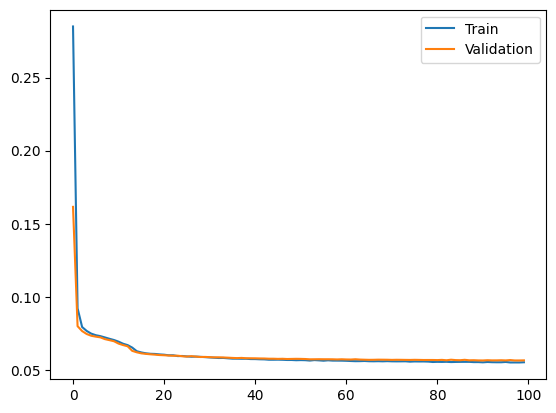

In [46]:
USE_PRETRAINED_MODEL=False
if USE_PRETRAINED_MODEL:
    model.load_state_dict(torch.load(f'Autoencoder/autoencoder_26_10_2023.pt'))
    print("Model loaded")

    display(Image('Autoencoder/Loss_autoencoder.png')) #this is the loss I have saved during the training of the autoencoder
    
else:
   l_train , l_val = train(model, train_loader, val_loader, loss_func, optimizer,  num_epochs=100) 
   #with 50 epochs it takes around 10 minutes (on the whole dataset) on my PC
   torch.save(model.state_dict(), 'Autoencoder/autoencoder.pt')
   print("Model saved")

   plt.plot(l_train, label="Train")
   plt.plot(l_val, label="Validation")
   plt.legend()
   plt.show()

In [40]:
out, encoded = model(train_set.dataset.tensors[0])

In [41]:
out = out.detach().numpy()
encoded = encoded.detach().numpy()
print(out.shape)

(5000, 1, 28, 28)


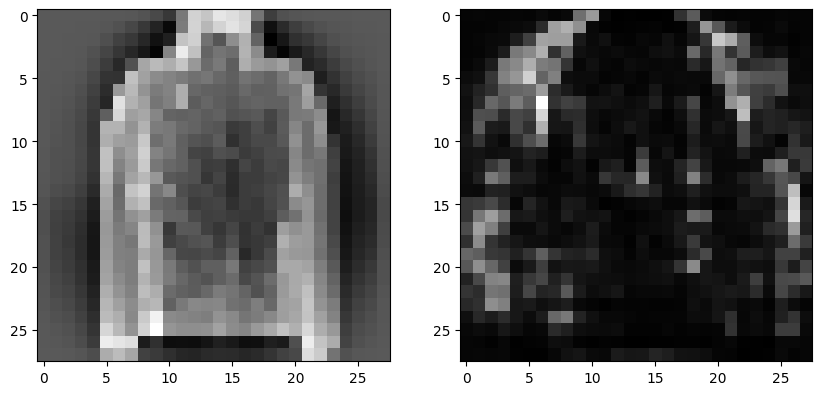

In [42]:
idx=0

image = Xtrain[idx].reshape((28,28))
image_out = out[idx].reshape((28,28))

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[1].imshow(image_out, cmap='gray')
plt.show()

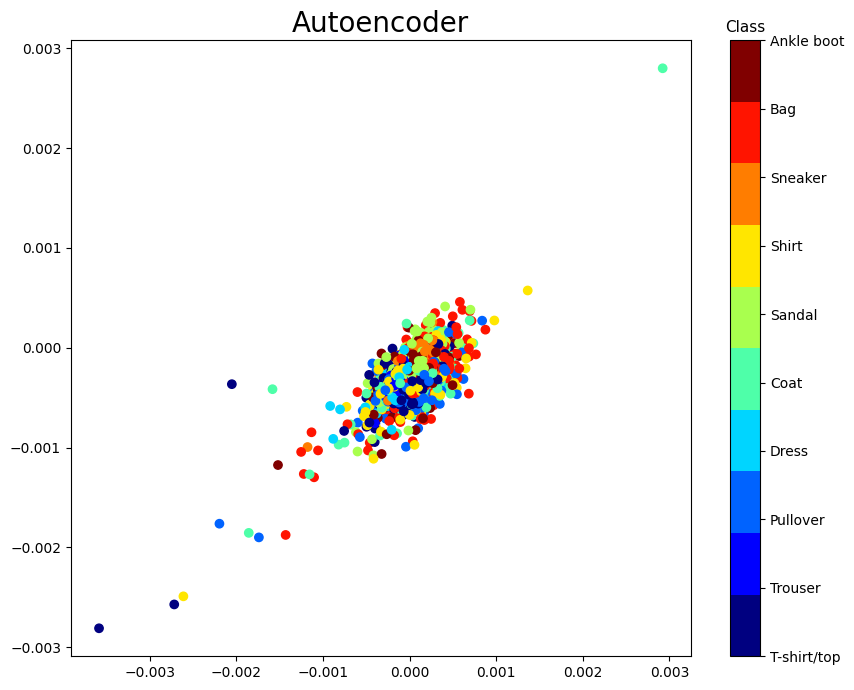

In [43]:
plt.figure(figsize=(10,8))
cmap = plt.get_cmap('jet', 10)
p = plt.scatter(encoded[:,0], encoded[:,1], c=ytrain, cmap=cmap)
cb = plt.colorbar(p)
cb.ax.set_title('Class', fontsize=11)
cb.ax.set_yticklabels(labels_dict.values())
plt.title("Autoencoder", fontsize=20)
plt.show()
plt.close()

What happens when you have an autoencoder with a single layer and linear activation function for both the encoder and the decoder?

Do you recognize any known structure?